# Introduction
This notebook will be an initial look at the data that was recently gathered. 

In [31]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
filepath = 'D:/Courses/UUJ/Research Project/masters_project/Data Collection/RawDataCollection/Closed Door'

# Change the working dir
os.chdir(filepath)

# list the contents
dir_contents = os.listdir()
# dir_contents

I have manually gone into this folder - this will need to be automated

In [3]:
# I only want the .csv files
ext = '*.csv'
files = glob.glob(ext)
files[0]

'grid1_door_closed.csv'

In [4]:
grid1_df = pd.read_csv(files[3])
grid1_df.head(10)

,[2023-01-01 15:20:48.842] Ultrasonic Sensor Data Capture Start,Unnamed: 1
0,[2023-01-01 15:20:48.845] Obstacle: closed door,NaN
1,[2023-01-01 15:20:48.845] Grid place: 1 (Steady),NaN
2,[2023-01-01 15:21:06.596] Ch1:,NaN
3,[2023-01-01 15:21:06.609] 604,NaN
4,[2023-01-01 15:21:06.610] 605,NaN
5,[2023-01-01 15:21:06.618] 605,NaN
6,[2023-01-01 15:21:06.622] 605,NaN
7,[2023-01-01 15:21:06.630] 597,NaN
8,[2023-01-01 15:21:06.634] 597,NaN
9,[2023-01-01 15:21:06.642] 597,NaN


In [5]:
# I just want the first column
col_names = grid1_df.columns
col_names[0]
data = grid1_df[col_names[0]]

In [6]:
data

0          [2023-01-01 15:20:48.845] Obstacle: closed door
1         [2023-01-01 15:20:48.845] Grid place: 1 (Steady)
2                          [2023-01-01 15:21:06.596] Ch1: 
3                            [2023-01-01 15:21:06.609] 604
4                            [2023-01-01 15:21:06.610] 605
                                ...                       
243851                       [2023-01-01 15:51:31.287] 605
243852                       [2023-01-01 15:51:31.295] 611
243853                       [2023-01-01 15:51:31.299] 611
243854                       [2023-01-01 15:51:31.307] 611
243855                       [2023-01-01 15:51:31.311] 610
Name: [2023-01-01 15:20:48.842] Ultrasonic Sensor Data Capture Start, Length: 243856, dtype: object

We can see above that there is a column with a lot of `NaN` values. I want to check is this is all this column contains. I have a feeling there is something else in that column. Actually, looking at it below, we can see the `dtype: float64` 

In [7]:
grid1_df[col_names[1]]

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
243851   NaN
243852   NaN
243853   NaN
243854   NaN
243855   NaN
Name: Unnamed: 1, Length: 243856, dtype: float64

In [8]:
nan_column = grid1_df[col_names[1]]
# type(nan_column)
nan_filtered = nan_column.isnull()

In [9]:
nan_filtered
res = [i for i, val in enumerate(nan_filtered) if not val]
res

[]

Okay, so, there is nothing in that column, so we can forget it now. We will focus on the `data` dataframe.

In [10]:
data.describe()

count                            243856
unique                           243713
top       [2023-01-01 15:50:45.920] 604
freq                                  3
Name: [2023-01-01 15:20:48.842] Ultrasonic Sensor Data Capture Start, dtype: object

Now I want to try and get the row indexs that contain the start and stop terms

In [11]:
# data.str.contains("start")
ch1_start_idx = [i for i,x in enumerate(data.str.contains("Ch1:")) if x]
ch2_start_idx = [i for i,x in enumerate(data.str.contains("Ch2:")) if x]
print("Channel 1 start indexes are:", ch1_start_idx)
print("Channel 2 start indexes are:", ch2_start_idx)

Channel 1 start indexes are: [2, 200012]
Channel 2 start indexes are: [100007]


Now, I will want to get the ending indexes.

In [12]:
ch1_end_idx = [i for i,x in enumerate(data.str.contains("Ch1 End")) if x]
ch2_end_idx = [i for i,x in enumerate(data.str.contains("Ch2 End")) if x]
print("Channel 1 end indexes are:", ch1_end_idx)
print("Channel 2 end indexes are:", ch2_end_idx)

Channel 1 end indexes are: [100004]
Channel 2 end indexes are: [200009]


Now, I want to get the times.

In [13]:
ch1_time_idx = [i for i,x in enumerate(data.str.contains("Channel 1 time")) if x]
ch2_time_idx = [i for i,x in enumerate(data.str.contains("Channel 2 time")) if x]
print("Channel 1 time indexes is:", ch1_time_idx)
print("Channel 2 time indexes is:", ch2_time_idx)

Channel 1 time indexes is: [100005]
Channel 2 time indexes is: [200010]


Now I need to slice up my data to remove the timestamp and turn the string formatted number into an int

In [38]:
# str(ch1_end_idx)
type(ch1_end_idx[0])

int

In [40]:
str_numbers = data.str[-4:] # this will give just the last few numbers
ch1_str_nums = str_numbers.iloc[3:ch1_end_idx[0]] # This is the actual distance numbers
ch1_str_nums

3          604
4          605
5          605
6          605
7          597
          ... 
99999      611
100000     610
100001     605
100002     605
100003     604
Name: [2023-01-01 15:20:48.842] Ultrasonic Sensor Data Capture Start, Length: 100001, dtype: object

In [42]:
# Converting to int
ch1_int_nums = pd.to_numeric(ch1_str_nums, errors='coerce').fillna(0).astype(np.int64)


(0.0, 700.0)

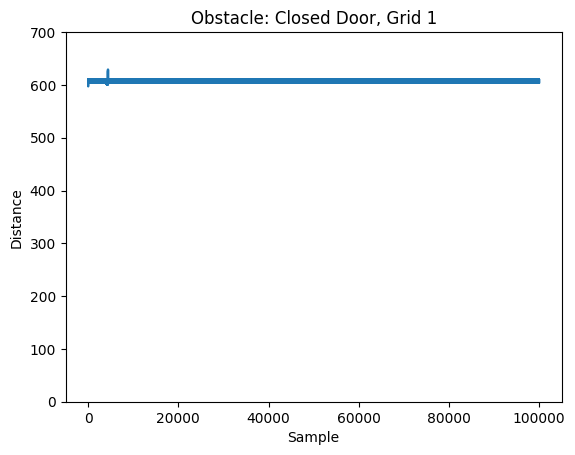

In [45]:
plt.plot(ch1_int_nums)
plt.title("Obstacle: Closed Door, Grid 1")
plt.xlabel("Sample")
plt.ylabel("Distance")
plt.ylim(0,700)